<a href="https://colab.research.google.com/github/palanithanarajk/malaria-detection-cnn/blob/master/malaria_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Malaria is a deadly disease predominantly caused by a parasite name Plasmodium falciparum which is transmitted by mosquito. It shows symptoms such as high fever and chills, which not treated in due time can be fatal. The disease is diagnosed by capturing the cell images of the blood and the presence of parasitic stains can be used to detect the Malarial disease.
## Dataset
The Kaggle dataset consists of two folders namely `uninfected` and `parasitized` cell images. The images are color images which are resized to a dimension of $$128 \times 128$$ The original dataset provides a total of around 25000 images. However, for running our simple DL algorithm we will be using only 100 images for each class. 
## Python Programming ENV
The following section explains about different Python Libraries we would be using for our Malaria detection method. As we are doing the development in the Google Colab, we don't need to install any module here. It is alreadly configured in the Colab ENV, only we have to import the required libraries for our application. The Python codes is grouped into different code chunks for each understanding. 
### Importing of common array and plotting librariers
This is for data importing and manipulation using NUMPY and PANDAS. Matplotlib and Seaborn for plotting graphs and images.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style



### Importing of OpenCV and Scikit-learn
OpenCV and Scikit-learn for image processing and machine learning respectivley.


In [0]:
import cv2 
import os
from sklearn.feature_extraction import image

## Mapping the cell image folder in Gdrive so that it is visible in Colab
click on the link and fetch the access key to mount the Gdrive to the Colab

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Data Preprocessing
Here we initialize a set of lists `X` & `Z` for the images and the labels. 

In [0]:
from tqdm import tqdm
X=[]
Z=[]
IMG_SIZE=128
norm_DIR='/content/gdrive/My Drive/Colab Notebooks/malaria-detect/data/uninfected' # change the path to point the data folder

mal_DIR='/content/gdrive/My Drive/Colab Notebooks/malaria-detect/data/parasitized' # change the path to point the data folder


### Creation of lists for the images and the labels
Here we create two functions for creating image lists and labels.


In [0]:
def assign_label(img,ret_type):
    return ret_type

def make_train_data(ret_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,ret_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

Here we call the functions to perform the array formation for the images and the labels.


In [34]:
make_train_data('Uninfected',norm_DIR)
print(len(X))

make_train_data('Parasitized',mal_DIR)
print(len(X))

100%|██████████| 100/100 [00:21<00:00,  4.64it/s]


100


100%|██████████| 100/100 [00:25<00:00,  3.95it/s]

200


## Plotting of the sample images
Here we plot some of the cell images of malarial and uninfected person blood. 


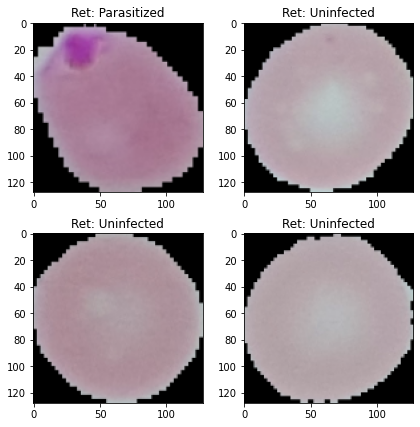

In [35]:
import random as rn
fig,ax=plt.subplots(2,2)
fig.set_size_inches(6,6)
for i in range(2):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Ret: '+Z[l])
        plt.tight_layout()

## Label Encoding
Here is a label preprocessing where we perform one hot encoding of the labels.

In [0]:
from sklearn.preprocessing import LabelEncoder
import tensorflow 
from tensorflow.keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

## Data Splitting
Here we perform the splitting of the dataset into `Training (75%)` and `Testing (25%)` datasets.


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 128, 128, 3)
(150, 2)
(50, 128, 128, 3)
(50, 2)


## Deep Learning Model based on CNN
This section explains about our deep learning model based on CNN. Here we will use 4 Convolutional blocks and 4 Max-Pooling blocks. Finally we will be having a classification layer based on SOFTMAX function for classifying the cell images as `uninfected` or `parasitized`.


In [0]:
#modelling starts using a CNN.
from tensorflow.keras.models import Sequential
import tensorflow as tf

model = Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(tf.keras.layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation ='relu'))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

## Deep learning model architecture
This sections shows the DL model based on CNN for cell image classification. The number of parametes are also provided here. 


In [39]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        8

## Model Compile
Here we compile the CNN model for checking any errors and initialize the ADAM optimizer. We have used `Cross-Entropy` has our loss function.


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


## Model Training
Here we train our DL model using `FIT` function. We use batch size of 8 and training epochs of 10

In [41]:
print('# Fit model on training data')
history = model.fit(x_train, y_train,
                    batch_size=8,
                    epochs=10,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_test, y_test))

# Fit model on training data
Epoch 1/10
19/19 [==============================] - 6s 323ms/step - loss: 0.7244 - accuracy: 0.5333 - val_loss: 0.6800 - val_accuracy: 0.6000
Epoch 2/10
19/19 [==============================] - 6s 310ms/step - loss: 0.6759 - accuracy: 0.6667 - val_loss: 0.6333 - val_accuracy: 0.6600
Epoch 3/10
19/19 [==============================] - 6s 312ms/step - loss: 0.6334 - accuracy: 0.6467 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 4/10
19/19 [==============================] - 6s 313ms/step - loss: 0.5674 - accuracy: 0.7067 - val_loss: 0.5348 - val_accuracy: 0.8400
Epoch 5/10
19/19 [==============================] - 6s 314ms/step - loss: 0.4812 - accuracy: 0.7733 - val_loss: 0.5568 - val_accuracy: 0.8000
Epoch 6/10
19/19 [==============================] - 6s 312ms/step - loss: 0.4575 - accuracy: 0.8333 - val_loss: 0.4751 - val_accuracy: 0.8000
Epoch 7/10
19/19 [==============================] - 6s 306ms/step - loss: 0.4447 - accuracy: 0.8267 - val_loss: 0.8459 

## Training Sequence-Accuracy
The plot showing the accuracy of the DL model during training and testing phase.

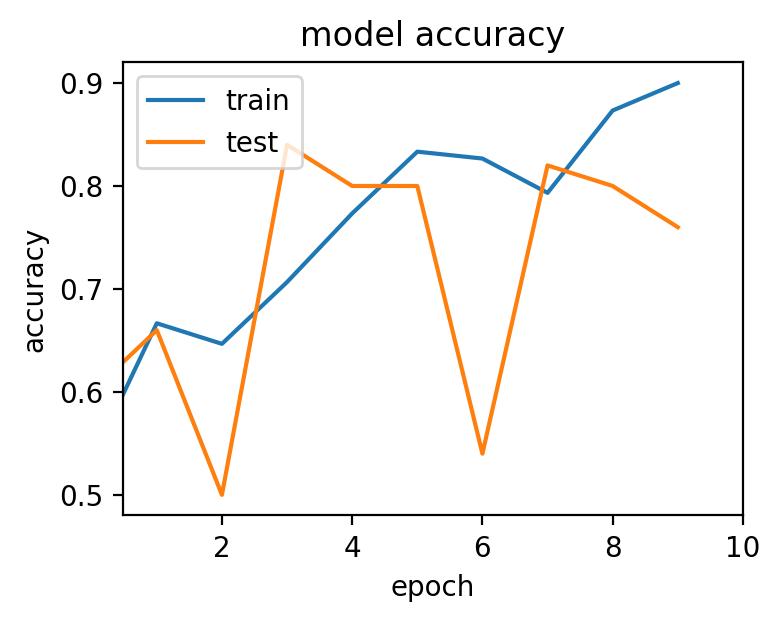

In [43]:
# summarize history for accuracy
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (4,3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim([min(plt.ylim()),10])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Training Sequence-Loss Function
The plot showing the loss of the DL model during training and testing phase.

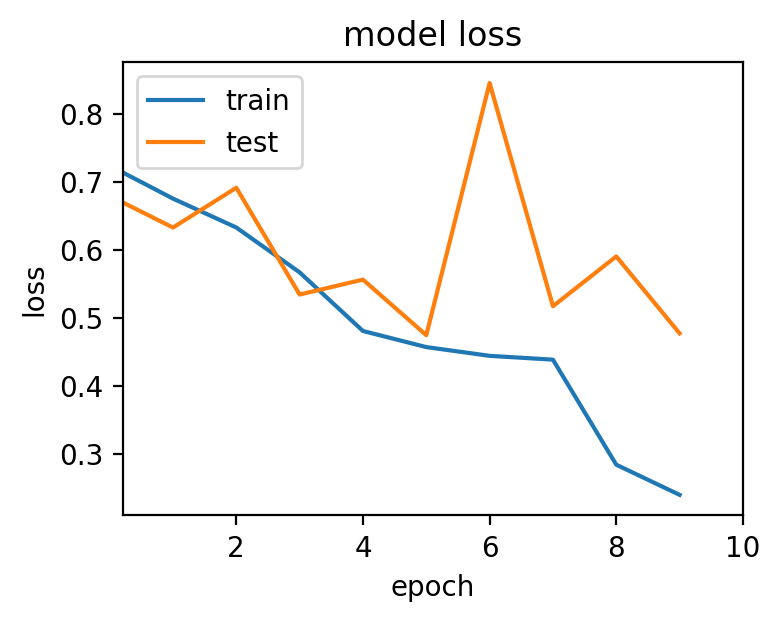

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.rcParams["figure.figsize"] = (4,3)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([min(plt.ylim()),10])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model Prediction for Evaluation


In [0]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes=np.argmax(y_test,axis=1)

## Testing Accuracy and Confusion Matrix


In [50]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
print('Accuracy for malaria disease classifier=',metrics.accuracy_score(predicted_classes,true_classes))
print('Confusion matrix=\n',confusion_matrix(true_classes, predicted_classes))

Accuracy for malaria disease classifier= 0.76
Confusion matrix=
 [[19  4]
 [ 8 19]]


## ROC plot of the DL model


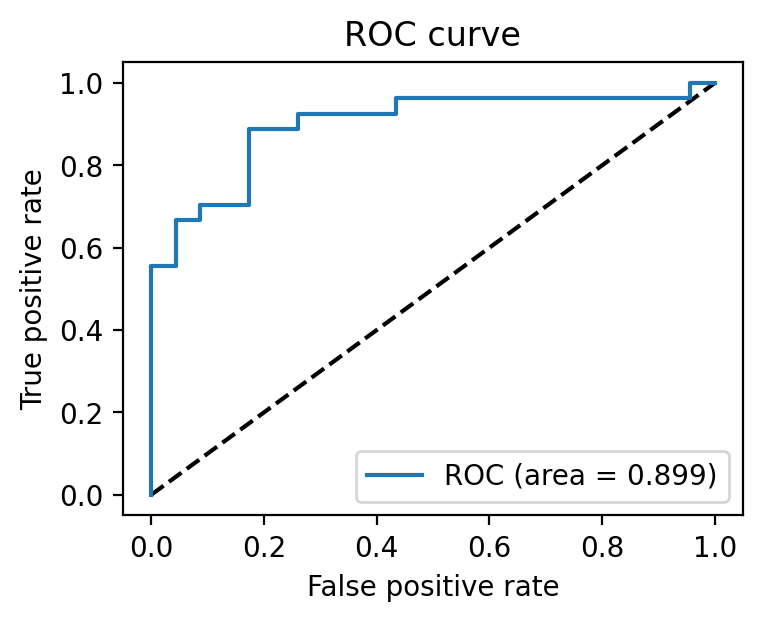

In [51]:
from sklearn.metrics import roc_curve, auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_classes, predictions[:,1])
auc_rf = auc(fpr_keras, tpr_keras)
plt.rcParams["figure.figsize"] = (4,3)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ROC (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Some papers for related information on Deep Learning Technologies:

* Bhandary A, Prabhu GA, Rajinikanth V, Thanaraj KP, Satapathy SC, Robbins DE, Shasky C, Zhang YD, Tavares JM, Raja NS. Deep-learning framework to detect lung abnormality–A study with chest X-Ray and lung CT scan images. Pattern Recognition Letters. 2020 Jan 1;129:271-8.
* Lakshmi D, Thanaraj KP, Arunmozhi M. Convolutional neural network in the detection of lung carcinoma using transfer learning approach. International Journal of Imaging Systems and Technology. 2019 Dec 28.
* Krishnan PT, Balasubramanian P. Detection of Alphabets for Machine Translation of Sign Language Using Deep Neural Net. In2019 International Conference on Data Science and Communication (IconDSC) 2019 Mar 1 (pp. 1-3). IEEE.
